In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv("Algerian_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [84]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [85]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [86]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [87]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [88]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


##### We will take FWI as our output feature for this project

In [89]:
X=df.drop(columns=['FWI'],axis=1)
Y=df['FWI']

In [90]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [91]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

####   Feature Engineering
##### We have to remove multicolinearity before training our model

<Axes: >

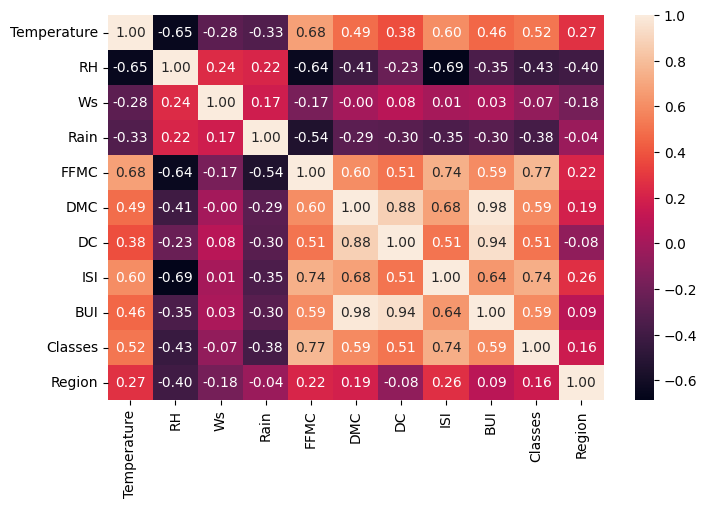

In [92]:
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(),annot=True,fmt='.2f')

In [93]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


In [94]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [95]:
corr_features=correlation(X,0.85)

In [96]:
corr_features

{'BUI', 'DC'}

In [97]:
X.drop(corr_features,axis=1,inplace=True)

In [98]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0,0.0


#### Model training

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

<Axes: >

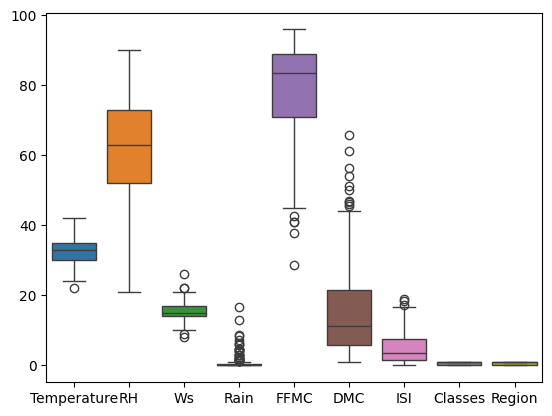

In [101]:
sns.boxplot(data=x_train)

In [35]:
#### Linear Regression model

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [103]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression()

In [104]:
y_pred=linreg.predict(x_test)

In [105]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5049978694165672
R2 Score 0.9805895859259883


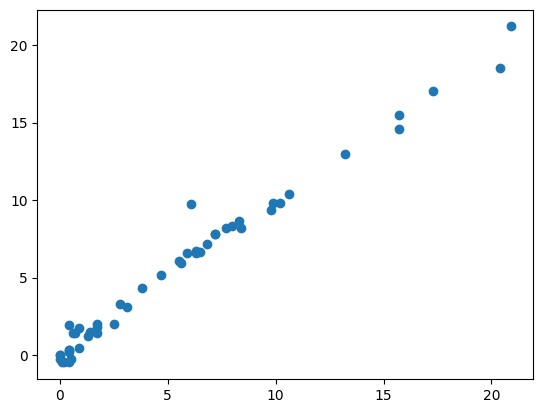

In [106]:
plt.scatter(y_test,y_pred)

#### Lasso Regression

In [107]:
from sklearn.linear_model import Lasso

In [108]:
lasso=Lasso()

In [109]:
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7554031265013279
R2 Score 0.9576771832329282


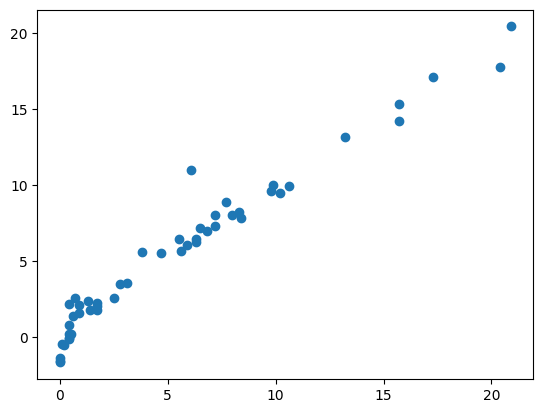

In [110]:
plt.scatter(y_test,y_pred)

#### Lasso Regression with CV

In [111]:
from sklearn.linear_model import LassoCV

In [112]:
lassocv=LassoCV(cv=5)

In [113]:
lassocv.fit(x_train,y_train)
y_pred=lassocv.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5335819596174383
R2 Score 0.9754526369567929


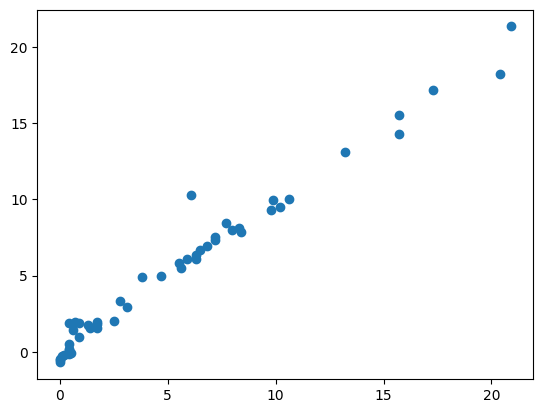

In [114]:
plt.scatter(y_test,y_pred)

#### Ridge Regression

In [123]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


In [121]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5031351137557413
R2 Score 0.9804802007168693


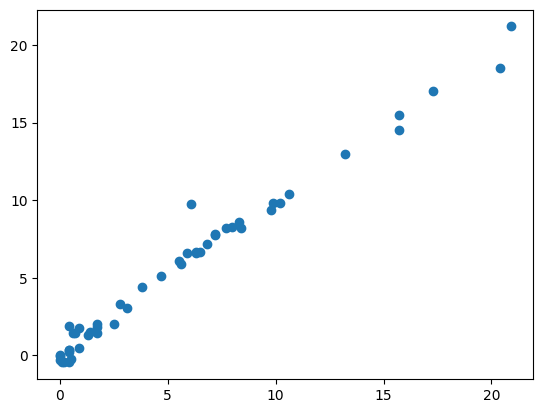

In [122]:
plt.scatter(y_test,y_pred)

Mean absolute error 0.5012709889882538
R2 Score 0.9793086205219895


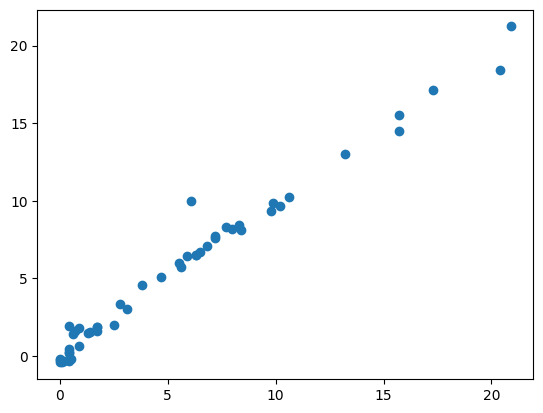

In [124]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

#### Ridge has best r2 score. So we will use that

In [125]:
import pickle

In [126]:
pickle.dump(ridge,open('ridge.pkl','wb'))